### Ensemble- ISLR -Exercise 8.4

#### Problem 8.4.1
Draw an example (of your own invention) of a partition of twodimensional feature space that could result from recursive binary
splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions R1,R2, . . ., the cutpoints t1, t2, . . ., and so forth.

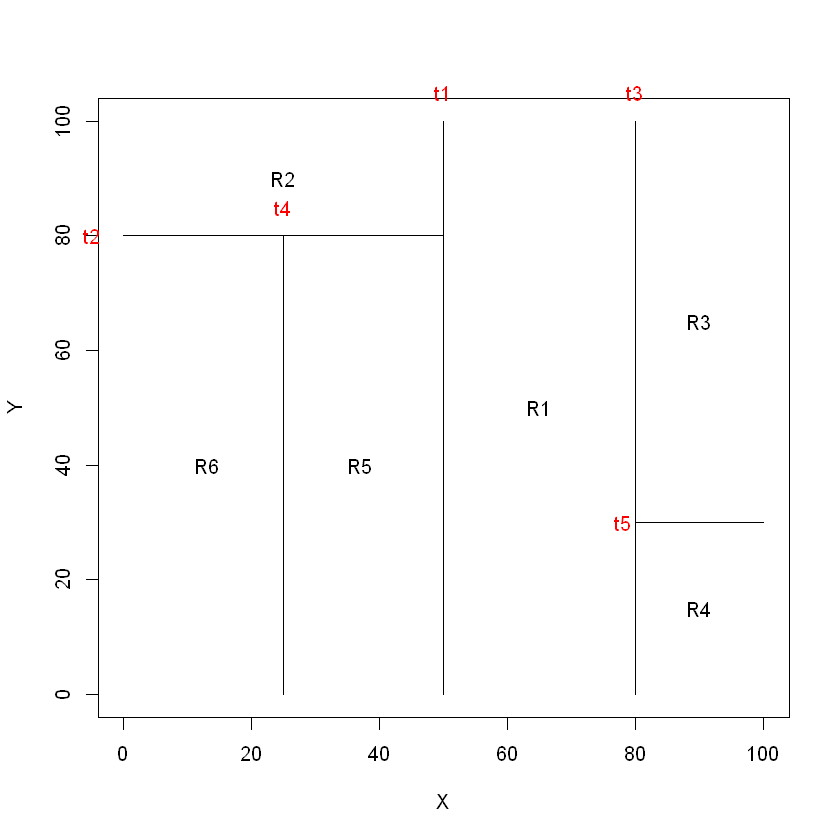

In [2]:
par(xpd = NA)
plot(NA, NA, type = "n", xlim = c(0,100), ylim = c(0,100), xlab = "X", ylab = "Y")

# t1: x = 50; (50, 0) (50, 100)
lines(x = c(50,50), y = c(0,100))
text(x = 50, y = 105, labels = c("t1"), col = "red")

# t2: y = 80; (0, 80) (50, 80)
lines(x = c(0,50), y = c(80,80))
text(x = -5, y = 80, labels = c("t2"), col = "red")

# t3: x = 80; (80,0) (80, 100)
lines(x = c(80,80), y = c(0,100))
text(x = 80, y = 105, labels = c("t3"), col = "red")

# t4: x = 25; (25,0) (25, 80)
lines(x = c(25,25), y = c(0,80))
text(x = 25, y = 85, labels = c("t4"), col = "red")

# t5: y=30; (80,30) (100,30)
lines(x = c(80,100), y = c(30,30))
text(x = 78, y = 30, labels = c("t5"), col = "red")


text(x = (50+80)/2, y = 50, labels = c("R1"))
text(x = 25, y = (100+80)/2, labels = c("R2"))
text(x = (80+100)/2, y = (100+30)/2, labels = c("R3"))
text(x = (80+100)/2, y = 30/2, labels = c("R4"))
text(x = 37, y = 80/2, labels = c("R5"))
text(x = 13, y = 80/2, labels = c("R6"))


#### Problem 8.4.2
It is mentioned in Section 8.2.3 that boosting using depth-one trees (or stumps) leads to an additive model.Explain why this is the case. You can begin with (8.12) in Algorithm 8.2.

Let f^(x) = 0 and ri = yi  for all values of i.

f^1(x) = c1I(x1<t1) + c’1 = 1/λ f1(x1)
  
Hence f^(x) = λ f^1(x)
	
ri  = yi - λ f^1(xi)

f^2(x) = c2I(x2<t2) + c’2 = 1/λ f2(x2)

Hence f^(x) = λ f^1(x) + λ f^2(x)

ri  = yi - λ f^1(xi) - λ f^2(xi)

Therefore  f^(x) = ∑^p (subscript)j=1  fj(xj)


#### Problem 8.4.5
Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):
0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.
There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

In [4]:
# Majority approach
p = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)
sum(p >= 0.5) > sum(p < 0.5)

[1] TRUE

The number of red predictions is greater than the number of green predictions based on a 50% threshold, thus RED.

In [5]:
# Average approach
mean(p)

[1] 0.45

The average of the probabilities is less than the 50% threshold, thus GREEN.

#### Problem 8.4.12
Apply boosting, bagging, and random forests to a data set of your choice. Be sure to ﬁt the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods like linear or logistic regression? Which of these approaches yields the best performance?

In [7]:
HR = read.csv(file = 'C:/Users/Thiya/Desktop/Wayne/Fall 2017/Analytics course/Project/HR.csv', header = T, sep = ',')
sample_size <- floor(0.75 * nrow(HR))
training_data <- sample(seq_len(nrow(HR)), size = sample_size)
train <- HR[training_data, ]
test <- HR[-training_data, ]
left_hr <- HR$left[-training_data]

In [10]:
#Logistic regression
fit.model2 <- glm(left ~ satisfaction_level + last_evaluation + number_project + average_montly_hours + time_spend_company + Work_accident + promotion_last_5years + sales + salary, data = HR, family = binomial, subset = training_data)
probs2 <- predict(fit.model2, test, type = "response")
pred.glm2 <- rep("Down", length(probs2))
pred.glm2[probs2 > 0.5] <- "Up"
table(pred.glm2, left_hr)

         left_hr
pred.glm2    0    1
     Down 2668  550
     Up    210  322

True Prediction rate is (2668 + 322) / (2668+550+210+322) = 0.7973 or 80% .In other words, 20% is the training error.

In [14]:
#Boosting
library(gbm)
boost.fit <- gbm(left ~ ., data = train, distribution = "bernoulli", n.trees = 5000)
boost.probs <- predict(boost.fit, newdata = test, n.trees = 5000)
pred.gbm2 <- rep("Down", length(boost.probs))
pred.gbm2[boost.probs > 0.5] <- "Up"
table(pred.gbm2, left_hr)


Warning message:
"package 'gbm' was built under R version 3.4.4"Loading required package: survival
Loading required package: lattice
Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


         left_hr
pred.gbm2    0    1
     Down 2854  651
     Up     24  221

True Prediction rate is (2854 + 221) / (2854+651+24+221) = 0.82 or 82% .In other words, 18% is the training error.

In [16]:
#Bagging
library(ipred)
mt <- bagging(left ~., data=train, coob=TRUE)
mt_probs <- predict(mt, newdata = test)
pred.mt <- rep("Down", length(mt_probs))
pred.mt[mt_probs > 0.5] <- "Up"
table(pred.mt, left_hr)

       left_hr
pred.mt    0    1
   Down 2842   78
   Up     36  794

True Prediction rate is (2842 + 794) / (2842+78+36+794) = 0.9696 or 96% .In other words, 4% is the training error.

In [3]:
#Randomforest
library(randomForest)


Warning message:
"package 'randomForest' was built under R version 3.4.4"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [5]:
rf_fit <- randomForest(left ~ . , data = train, mtry = 3)

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

In [8]:
rf_probs <- predict(rf_fit, newdata = test)
pred.rf <- rep("Down", length(rf_probs))
pred.rf[rf_probs > 0.5] <- "Up"
table(pred.rf, left_hr)

       left_hr
pred.rf    0    1
   Down 2833   25
   Up      5  887

True Prediction rate is (2833 + 887) / (2833+25+5+887) = 0.992 or 99% .In other words, 1% is the training error.

When compared to logistic regression bagging, boosting and randomforest methods are better in accuracy and randomforest with an accuracy of 99% gives the best performance among all these methods.